In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
# ----------------------------- #
# 1. Import Modules
# ----------------------------- #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import math
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')

In [3]:
# ----------------------------- #
# 2. Read Dataset
# ----------------------------- #
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [4]:
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1]) 

Number of rows is =  400  
Number of columns is =  5


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:

# ----------------------------- #
# 3. Data Overview
# ----------------------------- #
print("Data Overview :")
print(df.head())
print('#'*50)
print("\n Informations :")
print(df.info())
print('#'*50)
print("\n Description :")
print(df.describe())

Data Overview :
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
##################################################

 Informations :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
##################################################

 Description :
            User ID         Age  EstimatedSalary   Purch

In [7]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
User ID,400.000000,15691539.757500,71658.321581,15566689.000000,15626763.750000,15694341.500000,15750363.000000,15815236.000000
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

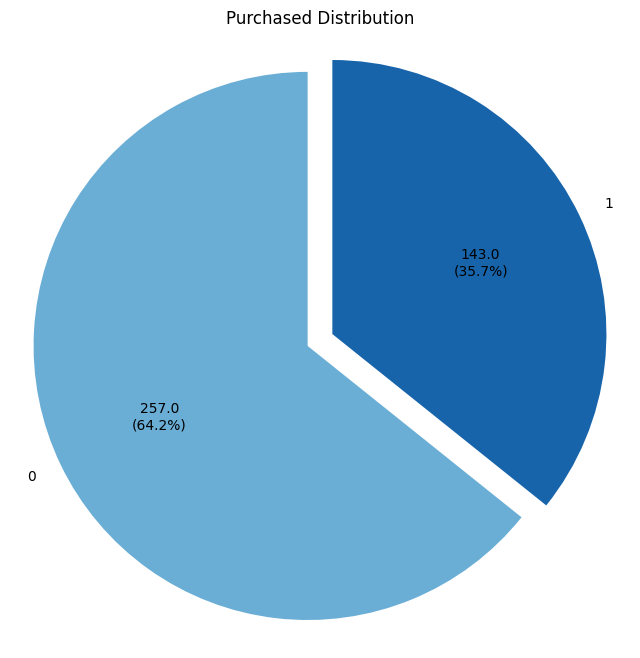

In [9]:
purchase_counts = df["Purchased"].value_counts()

explode = [0.05] * len(purchase_counts)

def func(pct, allvals):
    absolute = round(pct / 100.*np.sum(allvals), 0)
    return f"{absolute}\n({pct:.1f}%)"

plt.figure(figsize=(8, 8))
plt.pie(
    purchase_counts, 
    labels=purchase_counts.index, 
    autopct=lambda pct: func(pct, purchase_counts), 
    startangle=90, 
    colors=plt.cm.Blues([0.5, 0.8]),
    explode=explode
)
plt.title("Purchased Distribution")
plt.axis('equal')  
plt.show()


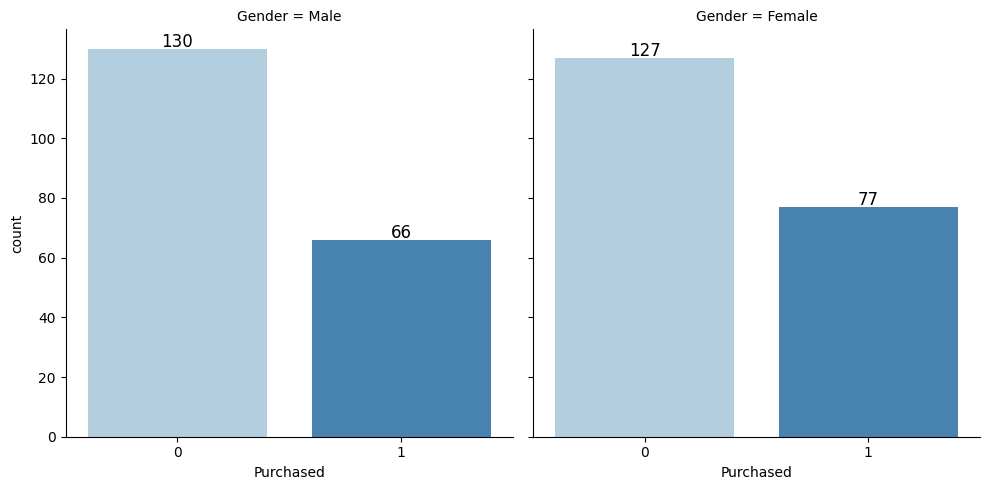

In [10]:
g = sns.catplot(x='Purchased', col='Gender', kind='count', data=df, palette="Blues")
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
plt.show()

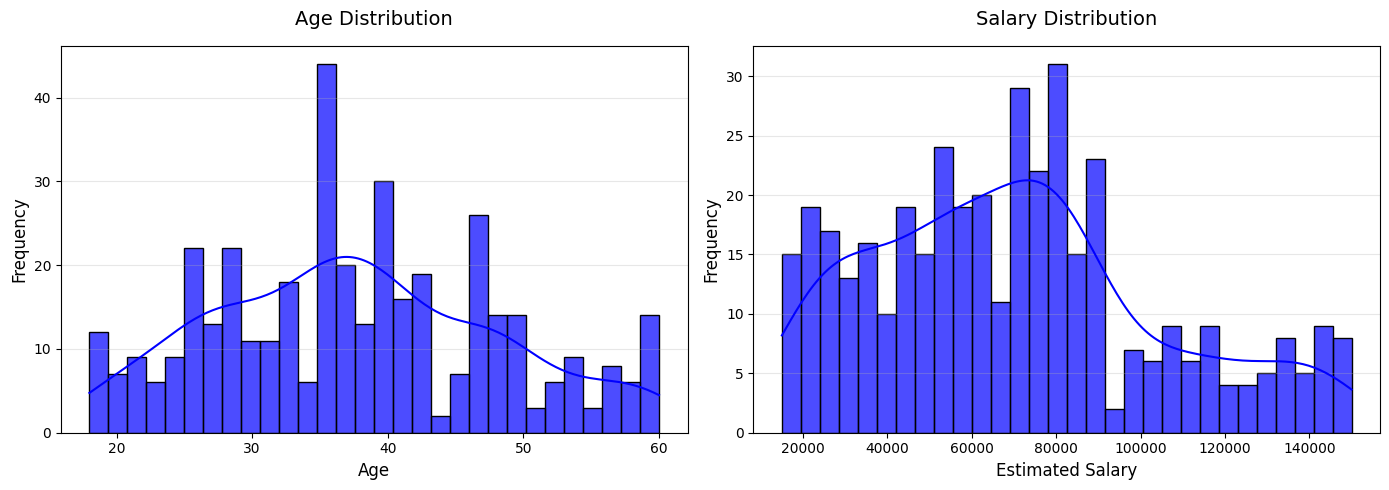

In [11]:
plt.figure(figsize=(14, 5))  # Wider figure to accommodate two plots

# First subplot - Age distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.histplot(df['Age'], kde=True, color='Blue', bins=30, edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Second subplot - Salary distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.histplot(df['EstimatedSalary'], kde=True, color='Blue', bins=30, edgecolor='black', alpha=0.7)
plt.title('Salary Distribution', fontsize=14, pad=15)
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

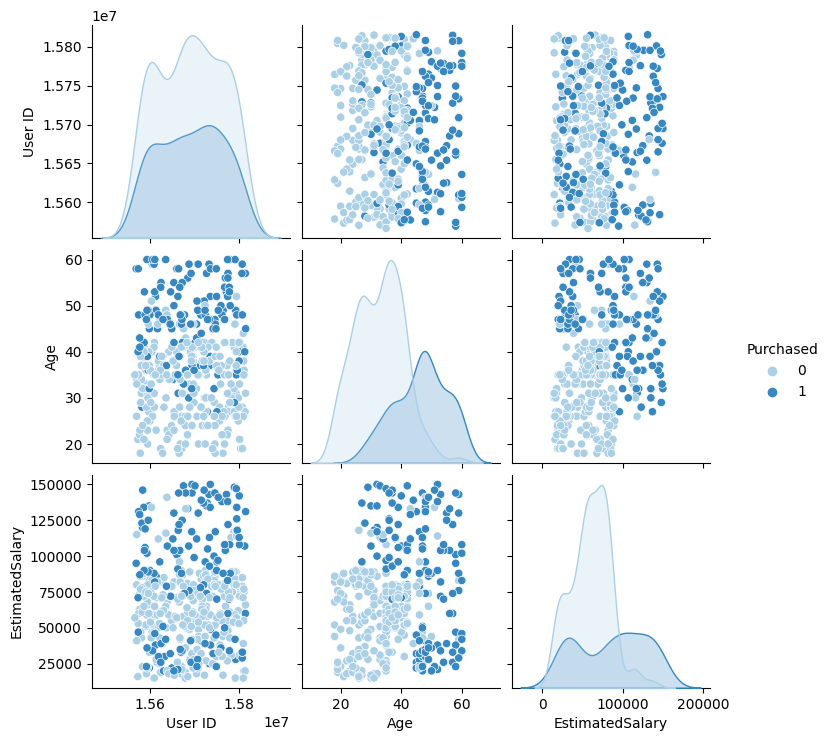

In [12]:
sns.pairplot(df , hue = 'Purchased',palette='Blues')
plt.show()

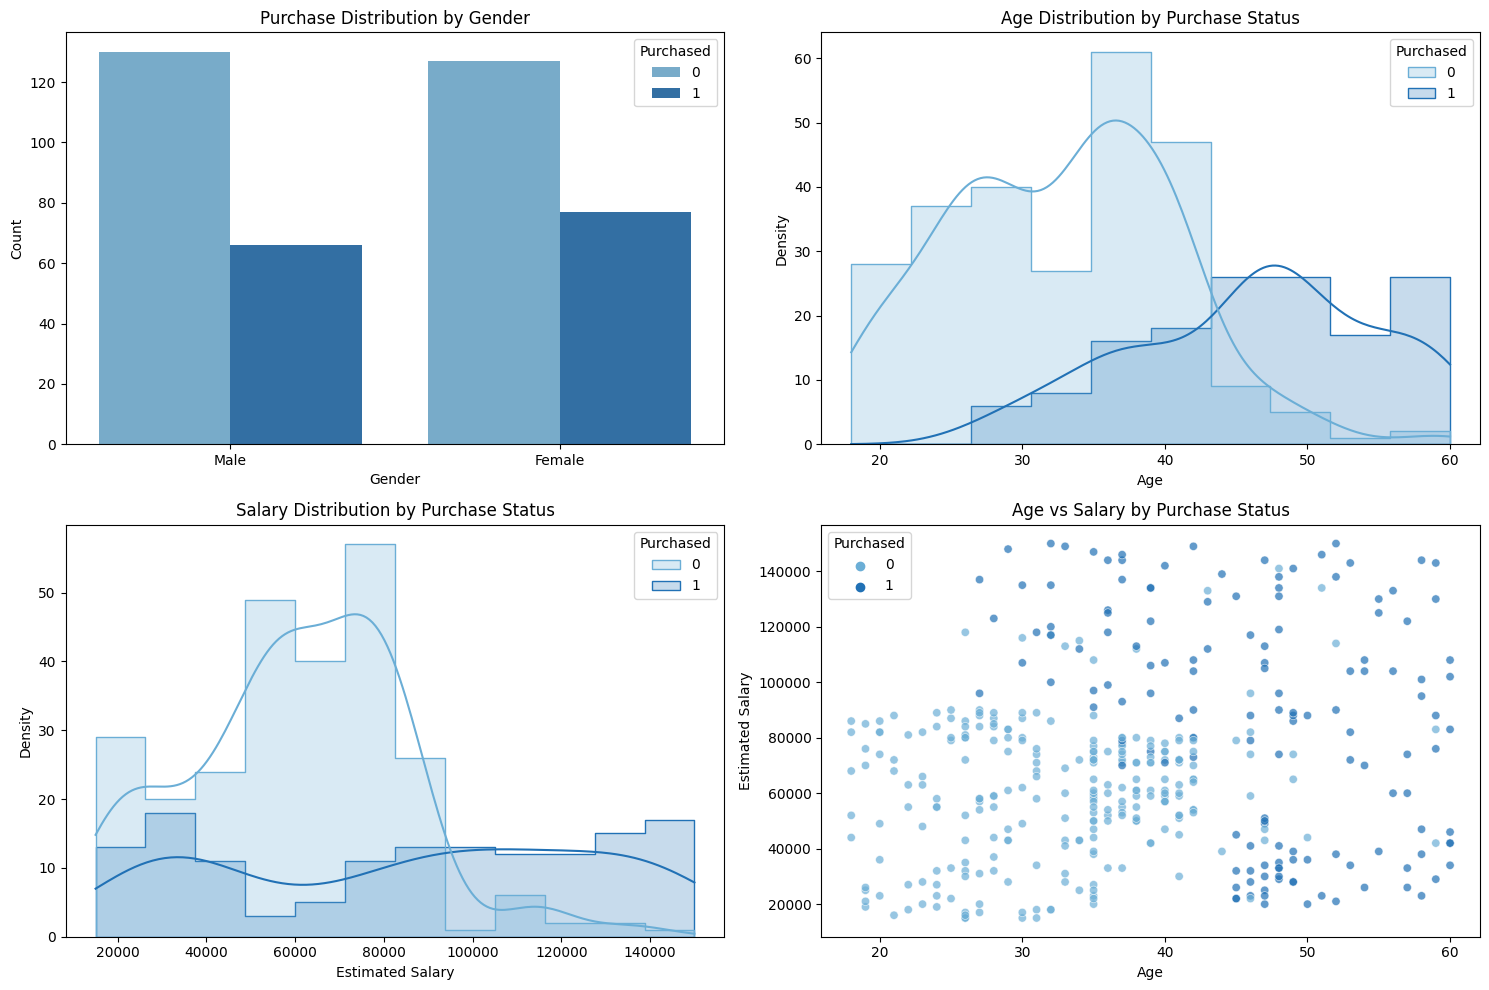

In [13]:
blue_palette = ['#6baed6', '#2171b5']

plt.figure(figsize=(15, 10))

# 1. Distribution of Purchases by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Purchased', data=df, palette=blue_palette)
plt.title('Purchase Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# 2. Age distribution by Purchase status
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Age', hue='Purchased', element='step', kde=True, palette=blue_palette)
plt.title('Age Distribution by Purchase Status')
plt.xlabel('Age')
plt.ylabel('Density')

# 3. Salary distribution by Purchase status
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased', element='step', kde=True, palette=blue_palette)
plt.title('Salary Distribution by Purchase Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')

# 4. Age vs Salary colored by Purchase status
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', alpha=0.7, palette=blue_palette)
plt.title('Age vs Salary by Purchase Status')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.tight_layout()
plt.show()


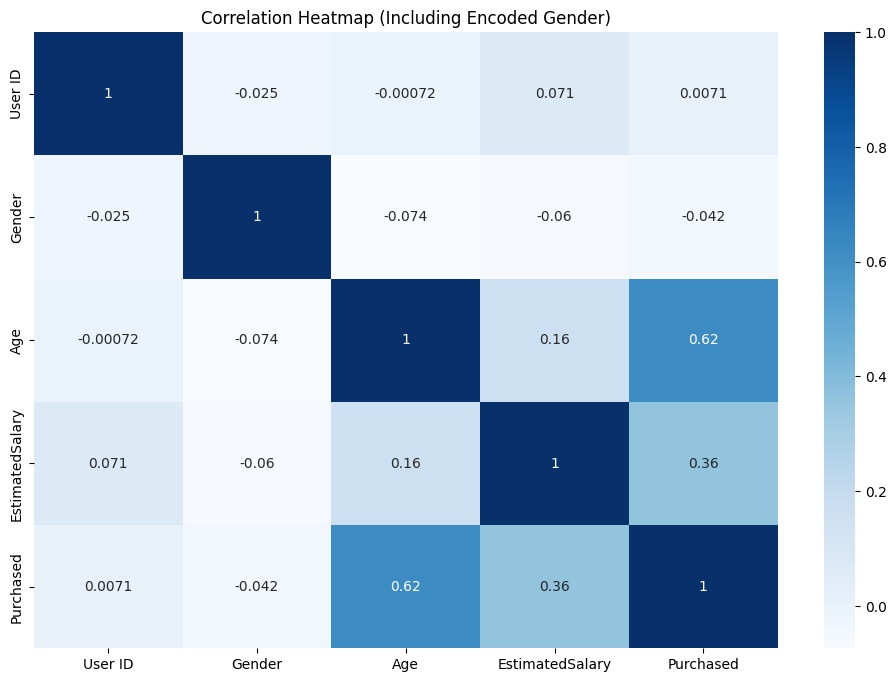

In [14]:
encoded_data = df.copy()
encoded_data['Gender'] = LabelEncoder().fit_transform(encoded_data['Gender'])  # Male=1, Female=0
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap (Including Encoded Gender)')
plt.show()


In [15]:
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [16]:
# ----------------------------- #
# 6. Calculate Gini and Entropy
# ----------------------------- #
def gini_impurity(y):
    probs = y.value_counts(normalize=True)
    return 1 - sum(probs ** 2)

def entropy(y):
    probs = y.value_counts(normalize=True)
    return -sum(p * math.log2(p) for p in probs if p > 0)

print(f"\n📐 Gini Index: {gini_impurity(y):.4f}")
print(f"📐 Entropy: {entropy(y):.4f}")


📐 Gini Index: 0.4594
📐 Entropy: 0.9406


In [17]:
# ----------------------------- #
# 7. Data Split
# ----------------------------- #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# ----------------------------- #
# 8. Model Training By Decision Tree
# ----------------------------- #
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

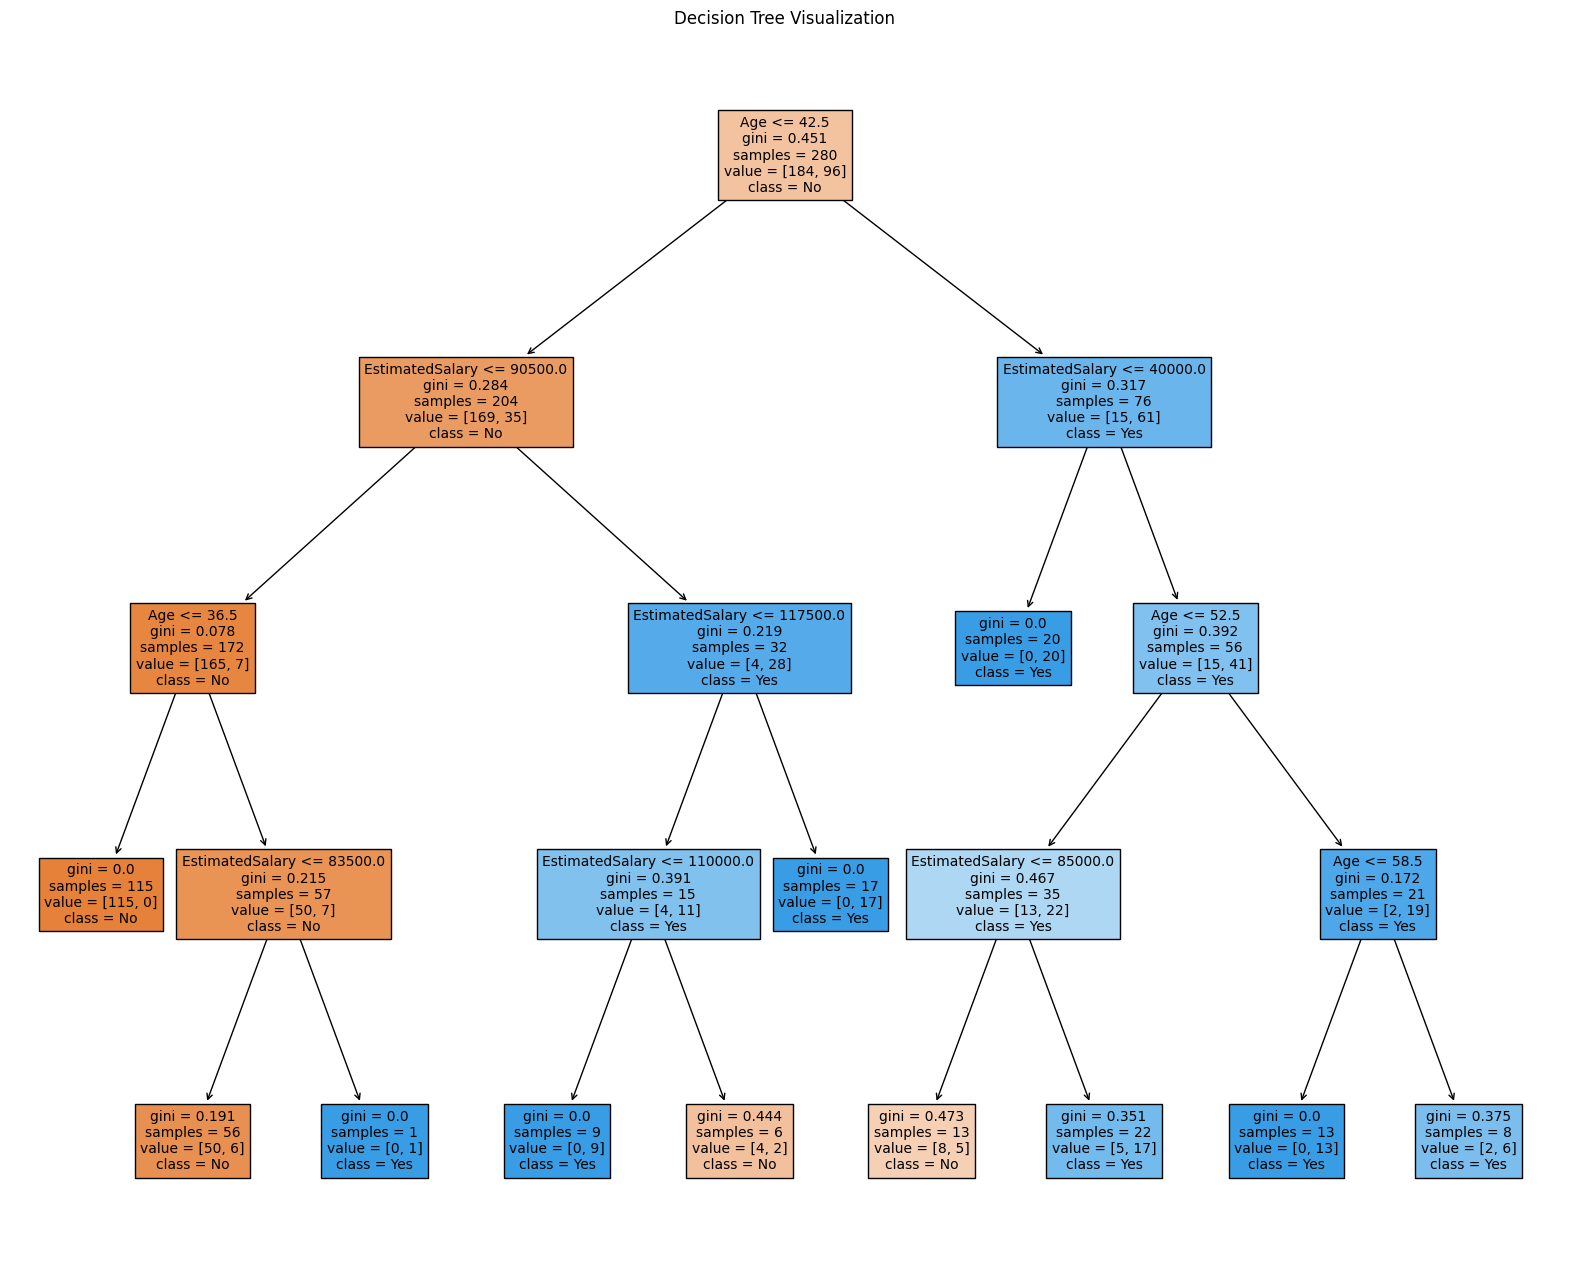

In [19]:
plt.figure(figsize=(20, 16))
plot_tree(clf, 
          feature_names=["Age", "EstimatedSalary"], 
          class_names=["No", "Yes"], 
          filled=True, 
          fontsize=10)  
plt.title("Decision Tree Visualization")
plt.show()



📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.91      0.89      0.90        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.93      0.92       120


✅ Accuracy: 92.50%

📉 Confusion Matrix:
[[69  4]
 [ 5 42]]


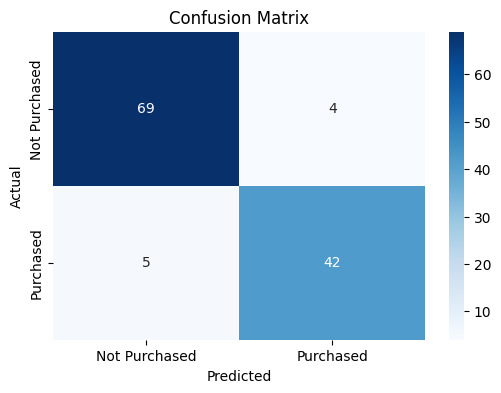

In [20]:
# ----------------------------- #
# 9. Model Validation
# ----------------------------- #
y_pred = clf.predict(X_test)

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.2%}")

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()